# USA Residential Building Energy Consumption Survey Regression Project
## 미국 주거용 건물 에너지 소비 회귀 분석
- 2015년 미국 EIA RBECS 1억 1,820만 가구를 대표하는 5,600가구
- https://www.kaggle.com/datasets/claytonmiller/2015-residential-energy-consumption-survey

#### feature (759개)

#### targets (1개)
- KWH: 전력 소비량

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 데이터 호출
r_df = pd.read_csv('./datasets/ResidentialBuildingEnergyConsumption.csv', low_memory=False)
r_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [3]:
# 데이터 프레임 복제
pre_r_df = r_df.copy()

In [4]:
# 결측치 제거
pre_r_df = pre_r_df[~pre_r_df.isna().any(axis=1)].reset_index(drop=True)

In [5]:
# 불필요한 피처 제거
pre_r_df = pre_r_df.drop(labels='DOEID', axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 복제
enc_r_df = pre_r_df.copy()
encoders = {}

# 문자열 컬럼 추출
columns = columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']

# 반복하여 컬럼 인코딩 처리:
for column in columns:
    # 레이블인코더 객체 생성
    encoder = LabelEncoder()
    # 문자열 데이터 정수로 형변환
    result = encoder.fit_transform(enc_r_df[column])
    # 형변환 값으로 대체
    enc_r_df[column] = result
    # 원본 데이터 담기
    encoders[column] = encoder.classes_

In [7]:
# 타겟 컬럼 위치 변경을 위해 새로운 컬럼에 데이터 담기
enc_r_df['target'] = enc_r_df.TOTALDOL
# 기존 컬럼은 제거
enc_r_df = enc_r_df.drop(labels='TOTALDOL', axis=1)

In [8]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
result = std.fit_transform(enc_r_df)
# 표준화 데이터 프레임 생성
std_r_df = pd.DataFrame(result, columns=enc_r_df.columns)

for column in std_r_df.columns:
    # 타겟 데이터 이상치 제거
    copy_std_r_df = std_r_df[std_r_df[column].between(-1.96, 1.96)]

# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
enc_r_df = enc_r_df.iloc[copy_std_r_df.index].reset_index(drop=True)

### Ⅲ. 분석

### 🌟 1Cycle

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 0.0001, RMSE: 0.0076, R2: 1.0000**

- 회귀 모델(LGBMRegressor)  
**MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932**

#### 💡 분석
- 회귀 분석 결과가 모두 1에 가깝게 나타났으나,  
  모델 평가 지표 확인 시 다중 공산성 등 다양한 수치들에 문제가 있는 것으로 보여져 적합하지 않은 모델이라 판단됨.
- 해당 문제를 해결하기 위해 차원 축소 진행 후 성능 평가를 확인하고자 함.

---

### 🌟 2Cycle

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, R2))

#### 📊 차원 축소

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [11]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [12]:
from sklearn.decomposition import PCA

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
pca = PCA(n_components=5)

# 타겟을 제외하고 피처만 차원 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(2546, 5) (637, 5)


In [13]:
# train
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['target']

# test
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['target']

In [14]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3542601  0.18294289 0.02098619 0.02014751 0.01809499]
0.5964316717307735


In [15]:
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,pca3,pca4,pca5,target
0,48255.087981,-12957.748423,33418.403658,-6957.022458,3132.558980,2806.59
1,-86110.141285,-81716.865559,-15703.480200,2987.693750,-757.521090,787.75
2,121519.883909,27556.780359,49893.320803,-14702.720125,3202.036085,2975.00
3,-68420.144807,-2549.026945,6285.377342,735.335834,217.474916,2060.69
4,25633.209627,91162.482260,-31492.782820,4913.636954,-2176.721059,1593.90
...,...,...,...,...,...,...
2541,-30909.000615,-11015.979834,-22138.743490,3183.524161,1149.149607,1128.51
2542,-104351.752538,19400.104002,14575.371521,-2902.830557,1334.672535,2168.51
2543,88851.966009,-33203.727631,-17188.663733,4545.152184,180.596236,1123.86
2544,154168.837789,163685.514346,-27565.127522,-5772.949516,-8573.174933,2888.16


,pca1,pca2,pca3,pca4,pca5,target
0,-90306.101876,281889.733370,3773.138681,-20985.344448,1303.736385,2929.40
1,-79003.009547,-40535.012771,1149.021835,-5324.864850,1752.081794,1268.30
2,-46175.386063,-56580.699659,624.434583,13096.533623,-781.218810,1544.32
3,-21841.684023,-60241.929854,-530.143710,58677.247676,-6881.522049,3089.34
4,27792.476438,47743.108645,-1429.436181,88181.860846,-10932.834846,3540.68
...,...,...,...,...,...,...
632,-23639.524429,115153.551733,6940.699112,31858.982270,6043.498622,2367.37
633,-92494.427872,121674.093768,2643.321885,-14548.309555,3796.932950,2830.86
634,-39922.297172,16237.906662,1082.462707,29407.694758,-2584.299538,2053.86
635,-147275.111943,57519.159777,3681.839319,-14109.511682,4673.355524,1696.21


#### 📊 선형 회귀

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 133157.7425, RMSE: 364.9079, R2: 0.7626


#### 📊 회귀 모델

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 모델 별 학습 진행:
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    prediction = model.predict(X_test)
    # 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
    print(model.__class__.__name__)
    # 평가
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 271252.7809, RMSE: 520.8193, R2: 0.5163
RandomForestRegressor
MSE: 136810.0294, RMSE: 369.8784, R2: 0.7560
GradientBoostingRegressor
MSE: 131765.3569, RMSE: 362.9950, R2: 0.7650
XGBRegressor
MSE: 149350.4791, RMSE: 386.4589, R2: 0.7337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2036, number of used features: 5
[LightGBM] [Info] Start training from score 1735.781851
LGBMRegressor
MSE: 137693.0593, RMSE: 371.0702, R2: 0.7545


In [19]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

# 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              68.98
Date:                Tue, 14 May 2024   Prob (F-statistic):                    8.47e-68
Time:                        21:02:52   Log-Likelihood:                         -22659.
No. Observations:                2546   AIC:                                  4.533e+04
Df Residuals:                    2541   BIC:                                  4.536e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [21]:
# 다중 공산성 확인
get_vif(features)

,vif_score,features
0,1.0,pca1
1,1.0,pca2
2,1.0,pca3
3,1.0,pca4
4,1.0,pca5


In [22]:
pca_train_df.corr()['target'].sort_values(ascending=False)[1:]

pca2    0.635905
pca3    0.587651
pca5   -0.008009
pca1   -0.022059
pca4   -0.114211
Name: target, dtype: float64

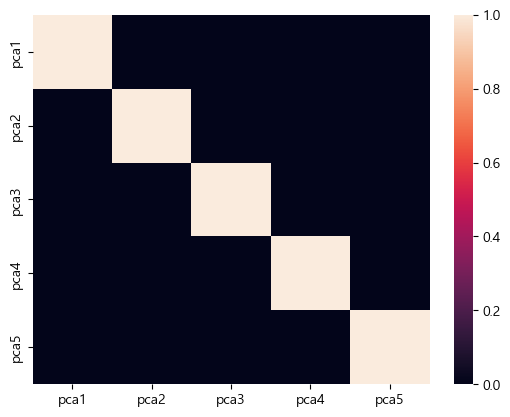

In [23]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

#### 📊 시각화

In [26]:
cycle2_data = {
    'model': ['선형회귀', '회귀모델(lgbm_r)', '차원축소 - 선형회귀', '차원축소 - 회귀모델(gb_r)'],
    'R2': [1.0000, 0.9932, 0.7626, 0.7650],
}

cycle2 = pd.DataFrame(cycle2_data)

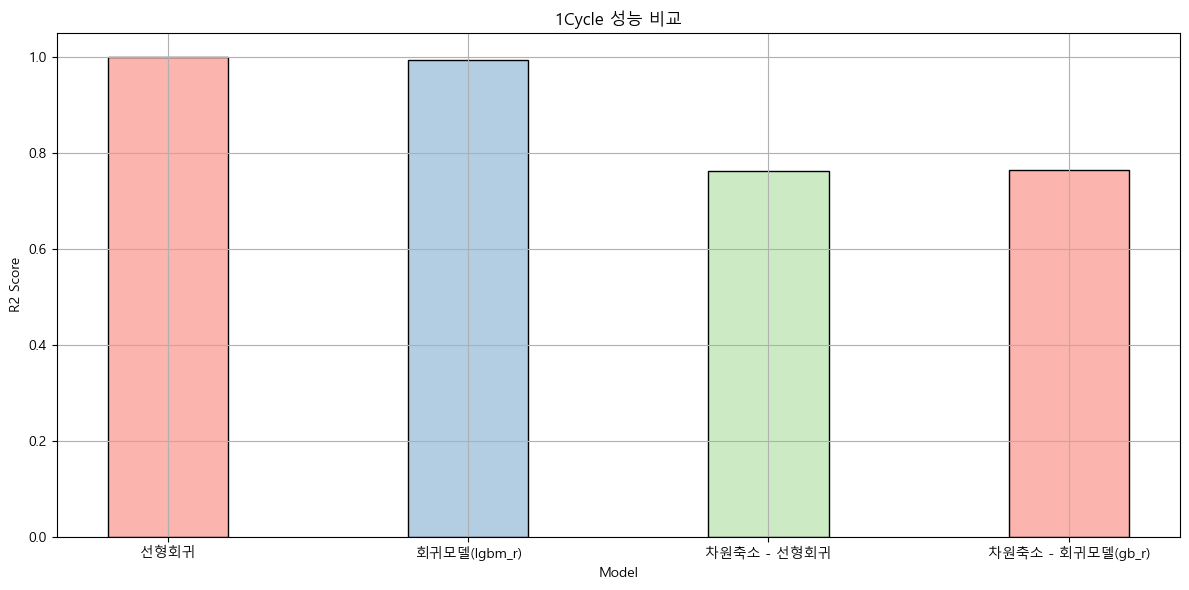

,model,R2
0,선형회귀,1.0000
1,회귀모델(lgbm_r),0.9932
2,차원축소 - 선형회귀,0.7626
3,차원축소 - 회귀모델(gb_r),0.7650


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.bar(cycle2['model'], cycle2['R2'], color=cmap(np.array([0, 1, 2])), edgecolor='black', width=0.4)
plt.title('1Cycle 성능 비교')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.45, 0.95)

plt.tight_layout()
plt.show()

display(cycle2)

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 0.0001, RMSE: 0.0076, R2: 1.0000**

- 회귀 모델(LGBMRegressor)  
**MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932**

#### 🚩 2Cycle 결과
- 차원축소 - 선형 회귀  
**MSE: 133157.7425, RMSE: 364.9079, R2: 0.7626**

- 차원축소 - 회귀 모델 (GradientBoostingRegressor)  
**MSE: 131765.3569, RMSE: 362.9950, R2: 0.7650**

#### 💡 분석
- 차원 축소 시 성능은 떨어지나 다중 공산성 등 지표가 해소된 것으로 나타남.  
  따라서 해당 모델을 사용하는 것이 적합하다 판단됨.